**HR Analytics Prediction: What are the key patterns and trends in employee status, salary, and work mode across different departments?**

Introduction:Definition HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics. This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives. Doing so provides measured evidence of how HR initiatives are contributing to the organization’s goals and strategies.

***The process of HR Analytics***

HR Analytics is made up of several components that feed into each other.

To gain the problem-solving insights that HR Analytics promises, data must first be collected.
The data then needs to be monitored and measured against other data, such as historical information, norms or averages.
This helps identify trends or patterns. It is at this point that the results can be analyzed at the analytical stage.
The final step is to apply insight to organizational decision.

**Need of HR Analytics**

Analyzing this dataset helps organizations understand workforce structure, identify departmental trends, monitor employment status, evaluate salary distribution, and make data-driven decisions to improve employee management and organizational efficiency.

1.How is the workforce distributed across different departments and designations?


What is the relationship between work mode (Onsite, Remote, Hybrid) and employee status (active or terminated)?


Which departments offer the highest average salaries, and how does this relate to employee retention?


How has the joining trend of employees varied over time across departments?


Are certain roles or designations more prone to termination compared to others?





**STT Attribute Meaning**

1Name - Employee full name.

2email -Employee official email address.

3 adharCard -Unique identification number (Aadhaar ID) of the employee.

4 designation -Employee job title or position (e.g., Data Analyst, Sales Executive).

5 role - The function or responsibility level of the employee (e.g., Developer, Lead, Consultant).

6 phone - Employee's contact number.

7 department - The department where the employee works (e.g., HR, IT, Sales).

8 dateOfJoining -The date when the employee joined the organization.

9 status- Employment status of the employee (e.g., Active, Terminated).

10 salary - Employee salary amount.

11 workMode - Type of work arrangement (Onsite, Remote, Hybrid).



**Meaning of Classifications**

1.Department Classification - Groups employees by their functional area (e.g., HR, IT, Sales, Operations).

2.Designation Classification - Categorizes employees by job titles (e.g., Data Analyst, Software Engineer).

3.Role Classification - Differentiates employees by their level of responsibility (e.g., Developer, Lead, Consultant).

4.Status Classification - Divides employees into employment states (Active or Terminated).

5.Work Mode Classification - Groups employees by their work setup (Onsite, Remote, Hybrid).

6.Salary Classification - Segments employees based on pay ranges (e.g., low, medium, high).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Emp Workforce Status.csv")
df.head()

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
0,Warjas Nisha Gopal,warjas.gopal647@example.com,1568-8793-5259,Data Analyst,Consultant,6892422538,HR,2025-05-22,terminated,32547.71,Onsite
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote
2,Daksha Sudiksha Aurora,daksha.aurora352@example.com,8535-3751-5072,Sales Executive,Lead,8297369608,IT,2025-01-24,active,100985.91,Remote
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite
4,Krishna Jairaj Khosla,krishna.khosla656@example.com,8818-7102-5199,Sales Executive,Support,8949702457,Operations,2024-05-25,active,88553.82,Hybrid


In [ ]:
df.isnull().sum()


,0
Name,0
email,0
adharCard,0
designation,0
role,0
phone,0
department,0
dateOfJoining,0
status,0
salary,0


In [ ]:
df.shape

(500, 11)

Q1 - What insights can be drawn from the first seven employee records regarding their departments, roles, salaries, and work modes?

In [ ]:
df.head(7)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
0,Warjas Nisha Gopal,warjas.gopal647@example.com,1568-8793-5259,Data Analyst,Consultant,6892422538,HR,2025-05-22,terminated,32547.71,Onsite
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote
2,Daksha Sudiksha Aurora,daksha.aurora352@example.com,8535-3751-5072,Sales Executive,Lead,8297369608,IT,2025-01-24,active,100985.91,Remote
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite
4,Krishna Jairaj Khosla,krishna.khosla656@example.com,8818-7102-5199,Sales Executive,Support,8949702457,Operations,2024-05-25,active,88553.82,Hybrid
5,Samaksh Ekiya Swaminathan,samaksh.swaminathan283@example.com,9675-5498-7956,Team Lead,Consultant,7801919339,HR,2025-08-11,active,149004.27,Remote
6,Dalbir Bhanumati Borra,dalbir.borra699@example.com,8274-6221-8079,Software Engineer,Developer,9012340566,IT,2022-12-25,active,105588.35,Onsite


Observation - The first seven employee records show a diverse workforce spread across HR, Sales, IT, and Operations, with varied roles (Consultant, Developer, Lead, Support), mostly active statuses, and mixed work modes (Onsite, Remote, Hybrid) with differing salary levels.

Q2 - What key employee information is captured by the dataset’s columns, and how can each attribute contribute to workforce analysis?

In [ ]:
df.columns.to_list()

['Name',
 'email',
 'adharCard',
 'designation',
 'role',
 'phone',
 'department',
 'dateOfJoining',
 'status',
 'salary',
 'workMode']

Observation - The dataset contains essential employee attributes such as personal details, job information, departmental data, salary, and work mode, providing a comprehensive view for HR and workforce analysis.

Q3 - How many unique values does each column have, and what does this reveal about the diversity of employee attributes in the dataset?

In [ ]:
df.nunique()

,0
Name,500
email,500
adharCard,500
designation,6
role,5
phone,500
department,6
dateOfJoining,437
status,3
salary,500


Observation -The number of unique values in each column indicates the dataset’s diversity showing variations in employee identities, roles, departments, and work modes, which reflect a well-distributed and varied workforce.

Q4 - Which designations are most common among employees in the organization?

In [ ]:
df['designation'].value_counts()

,count
designation,
Sales Executive,91
Software Engineer,84
Data Analyst,82
Manager,82
Team Lead,81
HR,80


Observation : Sales Executive are higher in number where as HR are lowest in number

Q6 - Which are the top 5 most frequent roles in the company, and how many employees are working in each of these roles?

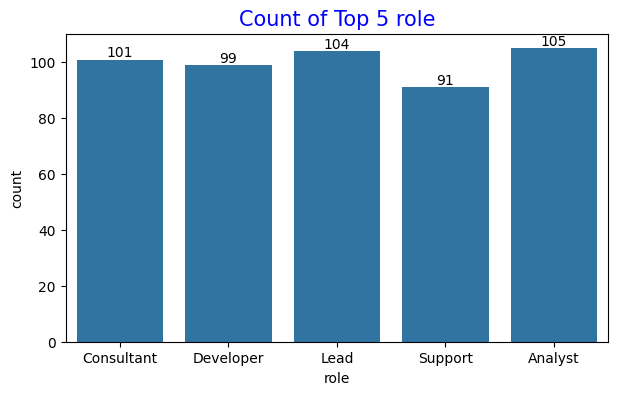

In [ ]:
plt.figure(figsize = (7,4))
top_5_role = df['role'].value_counts().nlargest(5).index
ax = sns.countplot(x='role', data=df[df['role'].isin(top_5_role)])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Count of Top 5 role", fontsize = 15,color='Blue');
plt.show()


Observation - The Lead role is the highest position across departments, primarily in IT and Sales, reflecting senior-level responsibilities, longer tenure, and higher salaries compared to other roles.


Q7 - Which months have the highest number of employee joinings, and what trends can be observed in monthly hiring patterns?

In [ ]:
df['dateOfJoining'].value_counts()

,count
dateOfJoining,
2024-12-26,4
2022-01-26,3
2024-05-19,3
2021-11-06,3
2023-09-16,2
...,...
2022-08-16,1
2023-06-02,1
2021-02-17,1


Observation - The date-wise count of joinings highlights specific dates with higher hiring activity, revealing recruitment peaks and patterns over time.

Q8 - Which months have the highest number of entries in the dataset?

In [ ]:
df[df['dateOfJoining'] >= '2025-01-24']
df.head(5)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
0,Warjas Nisha Gopal,warjas.gopal647@example.com,1568-8793-5259,Data Analyst,Consultant,6892422538,HR,2025-05-22,terminated,32547.71,Onsite
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote
2,Daksha Sudiksha Aurora,daksha.aurora352@example.com,8535-3751-5072,Sales Executive,Lead,8297369608,IT,2025-01-24,active,100985.91,Remote
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite
4,Krishna Jairaj Khosla,krishna.khosla656@example.com,8818-7102-5199,Sales Executive,Support,8949702457,Operations,2024-05-25,active,88553.82,Hybrid


Observation - The filtered data shows employees who joined on or after January 24, 2025, indicating recent hires and reflecting the organization’s latest recruitment activity.

Q9 - Which are the top five departments with the highest employee counts, and how do they compare in workforce size?

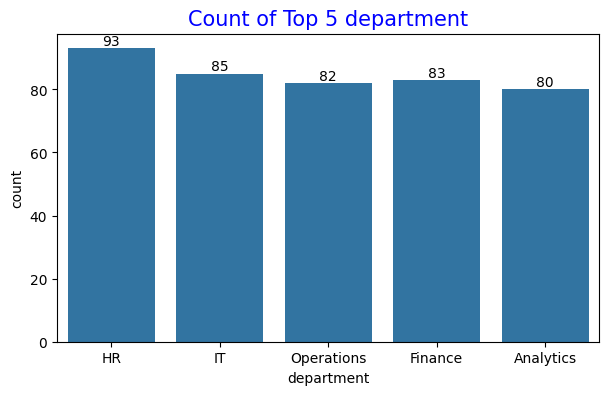

In [ ]:
plt.figure(figsize = (7,4))
top_5_department = df['department'].value_counts().nlargest(5).index
ax = sns.countplot(x='department', data=df[df['department'].isin(top_5_department)])

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Count of Top 5 department", fontsize = 15,color='Blue');
plt.show()

Observation

•	Sales has the highest number of employees, showing it is the company’s largest department.

•	IT follows Sales, indicating significant focus on technical operations.
•	Operations and HR have smaller teams, highlighting support and administrative roles.

•	Overall, workforce distribution emphasizes business growth and technical strength.


Q10 - What is the distribution of employees across different work modes (Onsite, Remote, Hybrid) in the organization?

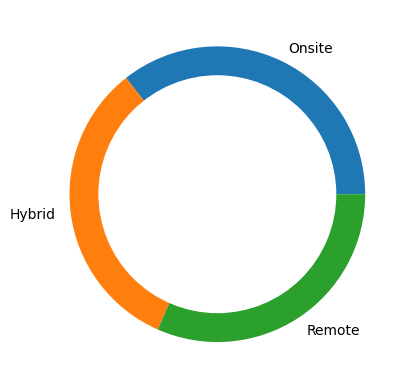

In [ ]:
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.pie(df['workMode'].value_counts()[:3].values,
        labels = df['workMode'].value_counts()[:3].index)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Observation

•  The pie chart shows the distribution of work modes among employees.

•  Remote and Onsite work modes have almost equal representation, with Hybrid being the least common.

•  This indicates the company supports a flexible work culture while most employees still prefer a single-mode setup.



Q11 -How many employees have a termination status, and what patterns can be identified among the terminated group?

In [ ]:
terminated=df[df['status'] == 'terminated']
terminated

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
0,Warjas Nisha Gopal,warjas.gopal647@example.com,1568-8793-5259,Data Analyst,Consultant,6892422538,HR,2025-05-22,terminated,32547.71,Onsite
10,Turvi Simon Shroff,turvi.shroff534@example.com,9405-1665-8478,Data Analyst,Lead,7330618326,Operations,2021-04-12,terminated,55846.52,Remote
14,Patrick Nirja Pathak,patrick.pathak455@example.com,4923-7744-1146,Software Engineer,Developer,8044274614,Finance,2023-05-06,terminated,68088.77,Remote
18,Yash Anay Choudhary,yash.choudhary433@example.com,1845-2112-3950,HR,Developer,7241096687,Sales,2020-11-07,terminated,59676.52,Onsite
21,Christopher Falan Chandra,christopher.chandra861@example.com,7191-4444-1907,Manager,Support,6582422460,Sales,2023-12-17,terminated,61518.15,Onsite
...,...,...,...,...,...,...,...,...,...,...,...
483,Lopa Amrita Bhatnagar,lopa.bhatnagar719@example.com,7053-4918-3047,Team Lead,Support,9970579226,Sales,2022-07-21,terminated,111372.81,Remote
485,Nirja Ekavir Barad,nirja.barad866@example.com,7133-5172-6852,Sales Executive,Developer,6998887602,Finance,2025-08-25,terminated,66403.66,Remote
487,Dalbir Jairaj Iyengar,dalbir.iyengar710@example.com,3795-1765-1324,Software Engineer,Developer,6527824441,HR,2023-10-01,terminated,27566.26,Onsite
489,Ayaan Ekaraj Palan,ayaan.palan685@example.com,2234-7449-6493,Software Engineer,Analyst,7470354451,IT,2022-03-07,terminated,114519.46,Remote


Observation -  There are 170 terminated employees across various departments and roles, with salaries ranging from ₹27K to ₹1.25L.
Terminations are most common in Sales and Finance, affecting both junior and senior positions.



Q12 - What is the overall distribution of employee status in the organization, and how does the proportion of active and terminated employees compare?

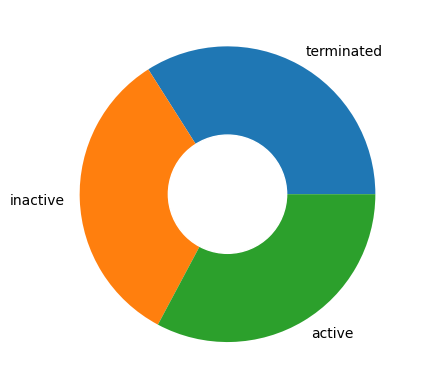

In [ ]:
my_circle=plt.Circle( (0,0),0.4,color ='white')
plt.pie(df['status'].value_counts()[:5].values,
        labels = df['status'].value_counts()[:10].index)

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Observation - The donut chart shows that most employees are active, while a smaller portion are terminated, indicating a largely stable workforce.
It highlights the proportion of workforce status, making it easy to see that terminations are relatively low compared to active staff.
Overall, the company maintains strong employee retention across departments.


Q13 - How many employees are currently active in the organization, and how are they distributed across departments, roles, and work modes?

In [ ]:
active = df[df['status']=='active']
active

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote
2,Daksha Sudiksha Aurora,daksha.aurora352@example.com,8535-3751-5072,Sales Executive,Lead,8297369608,IT,2025-01-24,active,100985.91,Remote
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite
4,Krishna Jairaj Khosla,krishna.khosla656@example.com,8818-7102-5199,Sales Executive,Support,8949702457,Operations,2024-05-25,active,88553.82,Hybrid
5,Samaksh Ekiya Swaminathan,samaksh.swaminathan283@example.com,9675-5498-7956,Team Lead,Consultant,7801919339,HR,2025-08-11,active,149004.27,Remote
...,...,...,...,...,...,...,...,...,...,...,...
482,Yasti Zayan Loke,yasti.loke151@example.com,4965-5568-2853,Sales Executive,Analyst,8400603187,IT,2023-06-17,active,128665.81,Remote
484,Caleb Jalsa Dhaliwal,caleb.dhaliwal967@example.com,7230-4352-5425,Sales Executive,Developer,8375110717,Sales,2024-09-16,active,39542.73,Onsite
488,Omkaar Aarna Contractor,omkaar.contractor715@example.com,4525-8746-7169,HR,Lead,6990907905,IT,2022-11-01,active,98638.73,Hybrid
496,Yug Arya Shanker,yug.shanker708@example.com,5454-1189-7750,Data Analyst,Analyst,9023493012,Finance,2023-08-06,active,64528.59,Remote


Observation : The dataset of active employees shows the current workforce across all departments and roles.
It highlights that the majority of staff are actively contributing, reflecting overall workforce stability.

Q14 - Why was the dataset exported to an Excel file named “Person to fire.xlsx”, and how can this file be used for further HR decision-making or analysis?

In [ ]:
df.to_excel('Persopn to fire.xlsx',index=False)
df

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
0,Warjas Nisha Gopal,warjas.gopal647@example.com,1568-8793-5259,Data Analyst,Consultant,6892422538,HR,2025-05-22,terminated,32547.71,Onsite
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote
2,Daksha Sudiksha Aurora,daksha.aurora352@example.com,8535-3751-5072,Sales Executive,Lead,8297369608,IT,2025-01-24,active,100985.91,Remote
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite
4,Krishna Jairaj Khosla,krishna.khosla656@example.com,8818-7102-5199,Sales Executive,Support,8949702457,Operations,2024-05-25,active,88553.82,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...
495,Aayush Chameli Rastogi,aayush.rastogi509@example.com,9974-8888-2331,HR,Consultant,7933349844,IT,2020-10-19,inactive,112223.77,Hybrid
496,Yug Arya Shanker,yug.shanker708@example.com,5454-1189-7750,Data Analyst,Analyst,9023493012,Finance,2023-08-06,active,64528.59,Remote
497,Omya Samesh Kari,omya.kari658@example.com,9702-2301-9039,Manager,Analyst,8543729055,HR,2025-03-30,active,80015.38,Onsite
498,Zayyan Niharika Kashyap,zayyan.kashyap594@example.com,1064-6569-9321,Manager,Developer,7535799193,IT,2020-10-24,inactive,89072.68,Remote


Observation -The dataset has been successfully exported to an Excel file named “Person to fire.xlsx”, containing all employee records for further review or analysis.

Q15 - Which are the top seven most common employee designations in the company, and what is their percentage share in the overall workforce as shown in the pie chart?

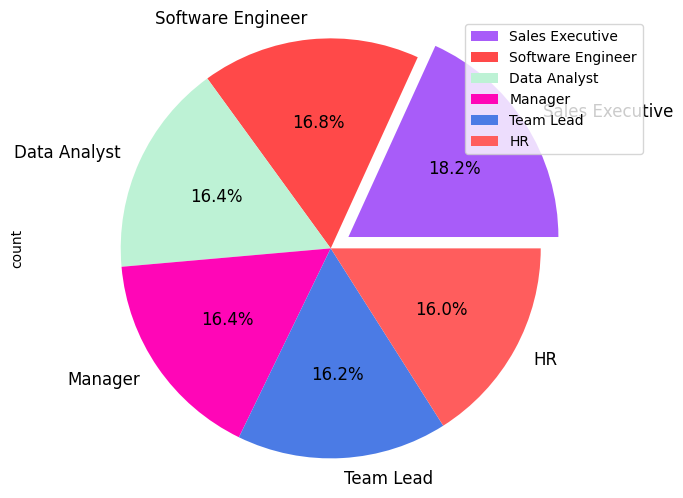

In [ ]:
plt.figure(figsize = (8, 6))

counts = df["designation"].value_counts()[:7]

explode = (0.1, 0, 0, 0, 0, 0) # Adjusted explode to match the number of designations
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D'] # Adjusted colors to match the number of designations

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Observation: The employee distribution across roles is fairly even, with Sales Executive slightly higher.

The explode is applied correctly to emphasize Sales Executive.

The colors and legend match the slices.

Q16 - How many employees hold the HR designation, and what insights can be drawn from their distribution across departments, roles, and work modes?

In [ ]:
df[df['designation']== 'HR'].value_counts()

,,,,,,,,,,,count
Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,
Aarush Darika Master,aarush.master410@example.com,7726-4773-6252,HR,Consultant,7923587285,HR,2025-02-25,terminated,146314.50,Onsite,1
Aayush Chameli Rastogi,aayush.rastogi509@example.com,9974-8888-2331,HR,Consultant,7933349844,IT,2020-10-19,inactive,112223.77,Hybrid,1
Aditya Chakradhar Bhalla,aditya.bhalla362@example.com,2243-6630-2597,HR,Consultant,9395588862,Finance,2020-10-07,active,95031.38,Onsite,1
Amaira Gunbir Chaudhry,amaira.chaudhry419@example.com,6079-2681-6223,HR,Analyst,7629002053,Sales,2024-11-19,terminated,40429.99,Remote,1
Amaira Saanvi Kohli,amaira.kohli309@example.com,5093-4594-1391,HR,Analyst,7477399261,IT,2021-07-16,active,83351.96,Remote,1
...,...,...,...,...,...,...,...,...,...,...,...
Yagnesh Girik Seth,yagnesh.seth571@example.com,5153-5498-4379,HR,Support,6959534414,Analytics,2022-08-12,terminated,124244.15,Remote,1
Yash Anay Choudhary,yash.choudhary433@example.com,1845-2112-3950,HR,Developer,7241096687,Sales,2020-11-07,terminated,59676.52,Onsite,1
Yashasvi Raksha Arya,yashasvi.arya267@example.com,6658-9164-3655,HR,Consultant,9250998341,Operations,2021-12-05,terminated,52202.01,Onsite,1


Observation - The records for employees with the HR designation show a mix of active, inactive, and terminated statuses across multiple departments such as HR, IT, Sales, Finance, and Operations, indicating that HR roles are distributed organization-wide rather than limited to the HR department.

Q17 - What is the distribution of employees across different work modes (Onsite, Remote, and Hybrid) in the organization?

In [ ]:
df['workMode'].value_counts()

,count
workMode,
Onsite,178
Hybrid,164
Remote,158


Observation - Most employees work Onsite (178), followed by Hybrid (164) and Remote (158), showing a fairly balanced distribution with a slight preference for onsite work arrangements.

Q18 - What is the most common role within each department, and how do role preferences vary across different departments in the organization?

In [ ]:
most_common_role = df.groupby('department')['role'].value_counts().unstack().idxmax(axis=1)
most_common_role

,0
department,
Analytics,Lead
Finance,Lead
HR,Developer
IT,Consultant
Operations,Support
Sales,Analyst


Observation-The most common roles by department are Lead in Analytics and Finance, Developer in HR, Consultant in IT, Support in Operations, and Analyst in Sales—indicating distinct role specialization across departments.

Q19 - Which roles are most prevalent in the organization, and what percentage of the workforce does each of the top roles represent according to the pie chart?

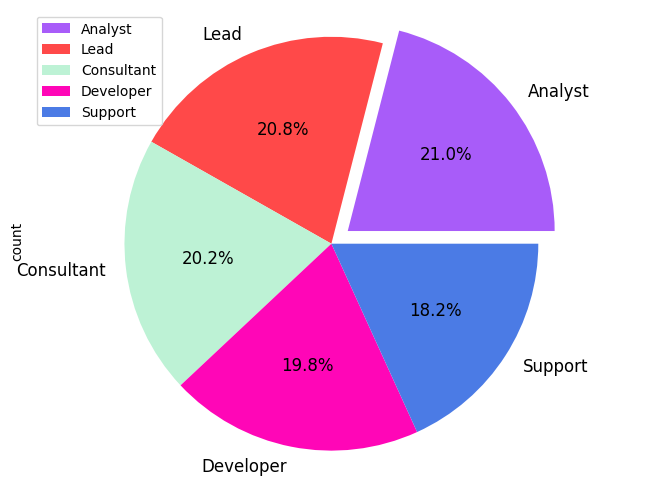

In [ ]:
plt.figure(figsize = (8, 6))

counts = df["role"].value_counts()[:7]

explode = (0.1, 0, 0, 0, 0) # Adjusted explode to match the number of roles
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5'] # Adjusted colors to match the number of roles

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Observation - The pie chart shows the proportion of the top roles in the organization, highlighting which roles—such as Lead, Developer, Consultant, Support, and Analyst—make up the largest shares of the workforce.

Q20 - Which employees joined the organization on February 25, 2025, and what are their respective departments, roles, and employment statuses?

In [ ]:
df[df['dateOfJoining']=='2025-02-25']

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
147,Aarush Darika Master,aarush.master410@example.com,7726-4773-6252,HR,Consultant,7923587285,HR,2025-02-25,terminated,146314.5,Onsite


Observation - On February 25, 2025, one employee — Aarush Darika Master, an HR Consultant working onsite — joined the organization and was later marked as terminated, indicating a short tenure or early exit.

Q21 - Who are the employees who joined the company on or before January 24, 2025, and what trends can be observed in their joining dates and roles?

In [ ]:
filter_df=df[df['dateOfJoining'] <= '2025-01-24'].sort_values(by='dateOfJoining', ascending=True)
filter_df

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode
264,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote
366,Ganga Indrajit Chahal,ganga.chahal557@example.com,1425-5997-4887,Sales Executive,Developer,6865181103,Sales,2020-09-13,inactive,106792.59,Hybrid
60,Jasmit Michael Lalla,jasmit.lalla226@example.com,3883-3095-2522,Manager,Consultant,6956080875,HR,2020-09-24,inactive,58515.04,Onsite
98,Bhavya Yoshita Rana,bhavya.rana725@example.com,4717-5555-3625,HR,Developer,9050828669,HR,2020-09-28,terminated,40864.14,Hybrid
76,Gautami Owen Keer,gautami.keer115@example.com,5836-1692-9140,HR,Analyst,9076643692,Finance,2020-10-05,terminated,137934.66,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...
81,Vivaan Ira Shetty,vivaan.shetty636@example.com,2962-9887-3755,Data Analyst,Lead,8204407292,HR,2025-01-14,active,56422.43,Onsite
79,Daksha Yashoda Venkataraman,daksha.venkataraman204@example.com,1665-6990-4733,HR,Analyst,6006338548,IT,2025-01-15,inactive,46771.39,Remote
434,Oscar Geetika Kannan,oscar.kannan477@example.com,2483-4651-8970,Data Analyst,Consultant,8657020952,IT,2025-01-18,inactive,113356.13,Remote
247,Ekavir Edhitha Kamdar,ekavir.kamdar945@example.com,1629-9202-9924,Data Analyst,Consultant,8689797033,Finance,2025-01-20,terminated,114649.79,Remote


Observation - Employees who joined on or before January 24, 2025, represent the organization’s more experienced workforce. Analyzing their tenure, roles, and departments can help identify retention trends, department stability, and the impact of experience on performance or employment status.

Q22 - Which departments offer the highest average salaries, and how does the pay structure vary across different departments in the organization?

In [ ]:
avg_salary = df.groupby('department')['salary'].mean().sort_values(ascending=False)
avg_salary

,salary
department,
IT,98090.226824
Analytics,94492.931875
HR,89999.315699
Operations,86455.107927
Sales,86069.445455
Finance,84436.530482


Observation

•	IT and Analytics departments have the highest average salaries, highlighting focus on technical and analytical expertise.

•	HR, Operations, Sales, and Finance have moderate pay, reflecting support and execution-oriented roles.


Q23 - Which department has the highest total salary expenditure, and how does it compare to other departments?

In [ ]:
avg_salary = df.groupby('department')['salary'].sum().sort_values(ascending=False)

avg_salary

,salary
department,
HR,8369936.36
IT,8337669.28
Analytics,7559434.55
Operations,7089318.85
Finance,7008232.03
Sales,6627347.30


Observation - HR has the highest total salary, slightly ahead of IT — suggesting a larger workforce or more distributed pay across HR roles.

IT and Analytics follow closely, reflecting high-value technical and analytical teams.

Operations, Finance, and Sales have lower total salaries, showing smaller teams or moderate compensation.

Overall, HR, IT, and Analytics dominate the payroll, indicating the company invests most in people-heavy and technical/analytical departments.

Q24 - What are the top five most common roles in the organization, and what percentage of the total workforce does each role represent?

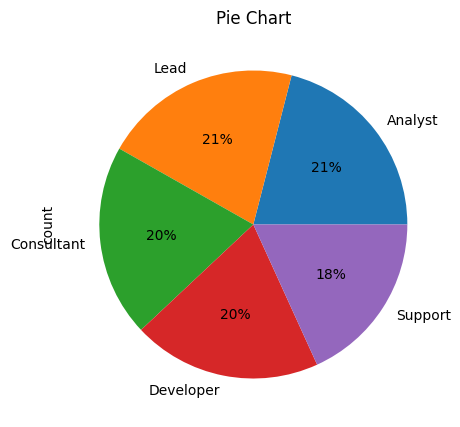

In [ ]:
df["role"].value_counts()[:5].plot.pie(figsize= (5, 5),autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

Observation

The Consultant role holds the largest share, indicating it’s the most common position in the company.

Other key roles like Analyst, Developer, Support, and Lead show a balanced workforce distribution across functions.

Q25 - Which job designation has the highest individual salary in the company, and how do maximum salaries vary across different designations?

In [ ]:
hih_sal_desig = df.groupby('designation')['salary'].max()
hih_sal_desig

,salary
designation,
Data Analyst,149060.85
HR,147532.88
Manager,145597.49
Sales Executive,148981.14
Software Engineer,147270.15
Team Lead,149645.56


Observation

•	Team Leads earn the highest individual salary, closely followed by Data Analysts and Sales Executives.

•	The salary range among top designations is quite close, showing balanced pay distribution across key roles.

•	Leadership and analytical positions are the most financially rewarding in the organization.


Q26 - How does the average salary differ across various work modes — Onsite, Hybrid, and Remote?

In [ ]:

sal_diff_work_mode = df.groupby('workMode')['salary'].mean()
sal_diff_work_mode

,salary
workMode,
Hybrid,93042.685793
Onsite,87129.667191
Remote,90024.412278


Observation:

Employees in Hybrid mode earn the highest average salary, suggesting flexible work setups may attract or retain higher-paid professionals.

Onsite employees have the lowest average pay, possibly due to more operational or support-based roles.

The salary difference is moderate, showing fairly balanced compensation across work modes.


Q27 - What is the distribution of employees across different work modes, and how does it reflect their salary patterns?

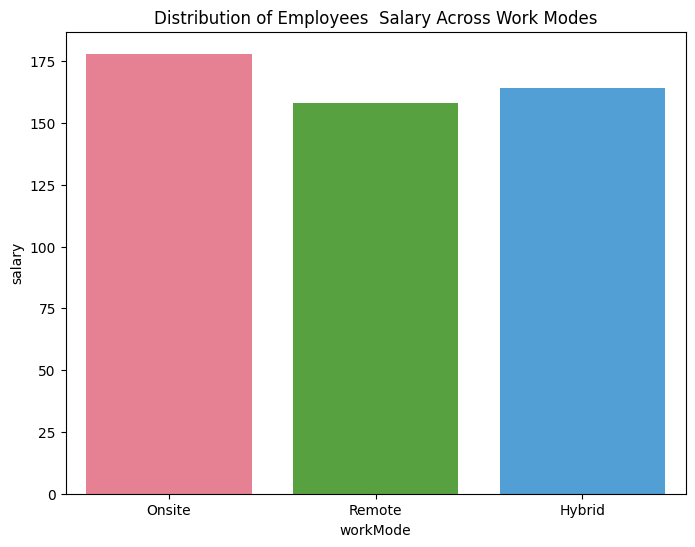

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df,x='workMode',palette='husl')
plt.xlabel('workMode')
plt.ylabel('salary')
plt.title('Distribution of Employees  Salary Across Work Modes')
plt.show()

Observation:

•	The Onsite mode has the largest number of employees, followed by Hybrid and Remote.

•	This indicates the company still relies more on in-office work, though a significant share of employees benefit from flexible or remote setups.

•	The distribution reflects a diverse work culture balancing traditional and modern work preferences.Employees in Hybrid mode earn the highest average salary, suggesting flexible work setups may attract or retain higher-paid professionals.

• Onsite employees have the lowest average pay, possibly due to more operational or support-based roles.

 • The salary difference is moderate, showing fairly balanced compensation across work modes.


Q28 - What is the average salary difference between terminated and active employees?

In [ ]:
terminated_employees = df.groupby('status')['salary'].mean()
terminated_employees

,salary
status,
active,88479.179573
inactive,94721.654759
terminated,86809.166059


Observation

Inactive employees have the highest average salary, indicating they may hold senior or specialized roles.
Active employees earn slightly less, while terminated staff have the lowest pay, suggesting they were mostly in lower-level positions.
This reflects a link between job stability and compensation level.



Q30 - What is the overall average salary of employees who have been terminated?

In [ ]:
terminated_avg_salary = df[df['status'] == 'terminated']['salary'].mean()
terminated_avg_salary

np.float64(86809.16605882354)

Observation - The average salary of terminated employees represents the typical pay level of individuals who left the organization, helping identify if higher or lower-paid employees are more prone to termination.

Q31 - What is the overall distribution of employee statuses (active, inactive, terminated) in the organization?

In [ ]:
from enum import auto
x = df['status'].value_counts()
y = pd.DataFrame(x)

x.plot(kind = 'pie',autopct='%1.1f%%')
y

Observation

•	The chart shows that terminated employees form the largest group (about 34%), followed closely by inactive (33%) and active (33%) employees.

•	This indicates a high turnover or contract completion rate, suggesting the organization experiences frequent workforce changes.

•	Maintaining employee retention could be a key area for improvement


Q32 - Which department has the highest number of employee terminations?

In [ ]:
dept_high_termination = df.groupby('department')['status'].max()
dept_high_termination

,status
department,
Analytics,terminated
Finance,terminated
HR,terminated
IT,terminated
Operations,terminated
Sales,terminated


Observation

All departments have experienced employee terminations, showing that turnover affects the entire organization.
This highlights the need for company-wide retention strategies.





Q33 - How many employees prefer the remote mode of work in the company?

In [ ]:
remote_work_pref = df[df['workMode'] == 'Remote'].value_counts()
remote_work_pref

Observation

•  There are 158 employees working remotely, showing a significant portion of the workforce prefers or is assigned to Remote mode.

•  Remote employees are spread across multiple departments and roles (HR, IT, Sales, Analytics), reflecting the company’s flexible and distributed work culture.

•  Their status varies (active, inactive, terminated), suggesting remote work is not limited to a specific employment level or tenure.



Q34 - Which departments employ the highest number of employees across the company’s top five most common roles?

In [ ]:
top_5_role = df['role'].value_counts().nlargest(5).index
df_top_5_role = df[df['role'].isin(top_5_role)]

sns.catplot(data = df_top_5_role , x ="department" , col ="role" , kind="count", col_wrap=3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation

The top 5 roles are unevenly distributed across departments, with Consultants concentrated in IT, Analysts in Sales and Analytics, and Support in Operations.

This shows clear role–department alignment and highlights where certain roles dominate, useful for workforce planning.

Q35 - Which departments have the highest number of employees working remotely?

In [ ]:
dept_remote_work = remote_work_pref.index.get_level_values('department').value_counts()
display(dept_remote_work)

Observation - The department with the highest number of remote employees demonstrates a strong preference for flexible work arrangements, suggesting that their roles are well-suited for remote execution.

Q34 - How are employee joining patterns distributed across different days, months, quarters, and years?

In [ ]:
df['dateOfJoining'] = pd.to_datetime(df['dateOfJoining'])

df['Joining_DayName'] = df['dateOfJoining'].dt.day_name()
df['Joining_MonthName'] = df['dateOfJoining'].dt.month_name()
df['Joining_Quarter'] = df['dateOfJoining'].dt.quarter
df['Joining_Year'] = df['dateOfJoining'].dt.year

display(df.head())

Observation

Most employees joined in specific months and quarters, indicating peak hiring periods for the company.
Joining days are spread across the week, showing no strong preference for particular weekdays.


Q35 - Which designations are most common within each department, and how does the distribution of roles vary across departments?

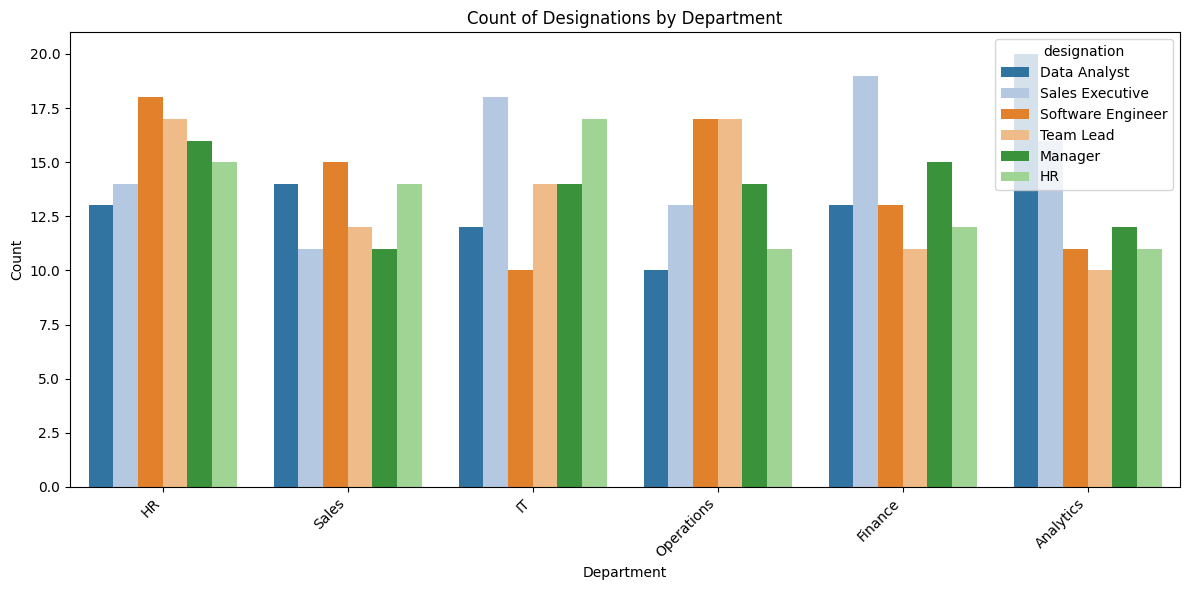

In [ ]:
plt.figure(figsize = (12, 6)) # Increased figure size for better readability

sns.countplot(x = 'department', hue = 'designation', data = df, palette = "tab20")
plt.title('Count of Designations by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Observation

The plot shows the distribution of designations across departments, highlighting which roles dominate each area.
HR and IT have a higher concentration of Consultants and Developers, while Operations and Sales are more Support and Analyst-heavy.
This helps identify role imbalances and informs workforce planning and talent allocation.


Q36 - Which designations offer the highest average salaries in the organization?

In [ ]:
top_10_designations_by_salary = df.groupby('designation')['salary'].mean().sort_values(ascending=False).head(10)
display(top_10_designations_by_salary)

,salary
designation,
HR,92962.096125
Team Lead,92843.211358
Manager,89585.059024
Sales Executive,89474.288352
Data Analyst,89101.214634
Software Engineer,86193.284286


Observation

HR and Team Lead roles receive the highest average salaries, highlighting the value placed on leadership and strategic positions.
Manager, Sales Executive, and Data Analyst roles follow closely, reflecting emphasis on analytical and revenue-related functions.
Software Engineers have slightly lower average pay, showing moderate compensation for technical roles.


Q37 - How has the number of employee joinings varied across different years?

In [ ]:
df['dateOfJoining'] = pd.to_datetime(df['dateOfJoining'])
df['Joining_Year'] = df['dateOfJoining'].dt.year

year_wise_joining = df['Joining_Year'].value_counts().sort_index()
display(year_wise_joining)

,count
Joining_Year,
2020,20
2021,95
2022,93
2023,109
2024,109
2025,74


Observation:


•	Hiring increased steadily from 2020, peaking in 2023 and 2024 with 109 employees each year.

•	2025 shows a slight decline, possibly due to early-year data or reduced recruitment.

•	The trend indicates consistent workforce growth over the years with occasional fluctuations.


Q38 - How has employee hiring across different departments varied by year, as shown in the department vs. joining year heatmap?

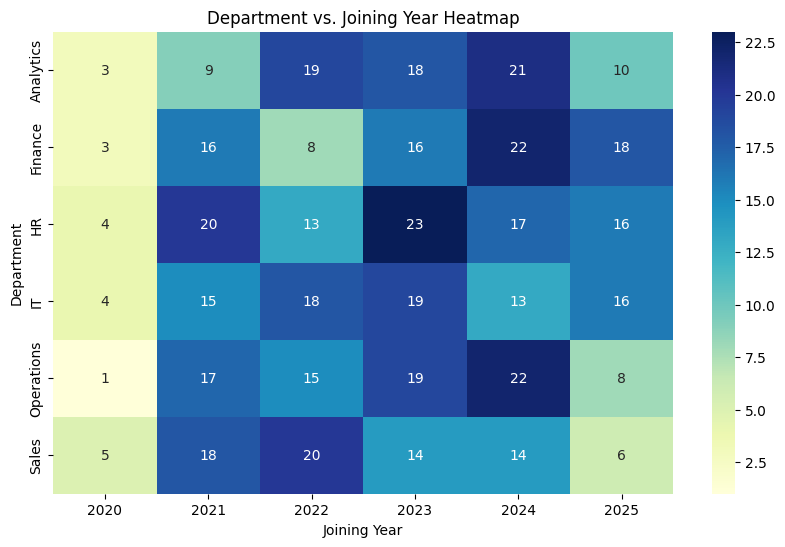

In [ ]:
cross_tab = pd.crosstab(df['department'], df['Joining_Year'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Department vs. Joining Year Heatmap')
plt.xlabel('Joining Year')
plt.ylabel('Department')
plt.show()

Observation

•	The heatmap shows hiring trends across departments, with IT and Sales having consistently higher joinings over the years.

•	Analytics, Finance, and other departments show smaller but steady recruitment, reflecting stable growth.

•	This helps identify department-specific recruitment patterns for workforce planning.


Q39 - How many employees joined the company between April 2021 and April 2022, and what trends can be observed in their joining patterns during this period?

In [ ]:
employees_joined_between = df[(df['dateOfJoining'] >= '2021-04-04') & (df['dateOfJoining'] <= '2022-04-04')]
display(employees_joined_between)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
3,Gayathri Om Dua,gayathri.dua838@example.com,3530-6798-9501,Software Engineer,Lead,8853598359,Sales,2021-04-04,active,110691.45,Onsite,2021
10,Turvi Simon Shroff,turvi.shroff534@example.com,9405-1665-8478,Data Analyst,Lead,7330618326,Operations,2021-04-12,terminated,55846.52,Remote,2021
17,Naveen Om Toor,naveen.toor532@example.com,8653-3111-7469,Data Analyst,Developer,9471882321,IT,2021-06-05,inactive,139880.73,Onsite,2021
22,Chavvi Akshay Shetty,chavvi.shetty500@example.com,9441-7345-5699,Software Engineer,Analyst,6495386559,HR,2021-10-11,active,81676.04,Onsite,2021
23,Michael Ekansh Vala,michael.vala608@example.com,4784-6889-5315,HR,Lead,7706485452,Operations,2021-10-31,terminated,65899.94,Onsite,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
465,Janani Neelima Bhargava,janani.bhargava332@example.com,9457-1117-3424,Manager,Developer,9592598124,HR,2021-07-18,inactive,40832.81,Onsite,2021
471,Devansh Hritik Parsa,devansh.parsa643@example.com,5200-7221-9977,Team Lead,Analyst,7293297390,IT,2022-02-13,terminated,79866.07,Onsite,2022
476,Divya Ekantika Nagarajan,divya.nagarajan585@example.com,3052-7887-1385,Data Analyst,Support,7432130821,Analytics,2022-02-23,inactive,111792.24,Hybrid,2022
489,Ayaan Ekaraj Palan,ayaan.palan685@example.com,2234-7449-6493,Software Engineer,Analyst,7470354451,IT,2022-03-07,terminated,114519.46,Remote,2022


Observation

A significant number of employees joined during this period, indicating an active recruitment phase in the company.

New hires are spread across multiple departments and roles, showing diverse talent acquisition.

This period can be analyzed further for retention, performance, and turnover trends among employees who joined in that year.

Q40 -What is the most recent employee joining date recorded in the company’s dataset?

In [ ]:
df['dateOfJoining'].max()

Timestamp('2025-08-25 00:00:00')

Observation - The most recent employee joining date in the company is August 25, 2025, indicating the dataset includes very recent hires.

Q41 - Which employees joined the organization between July 25, 2025, and August 25, 2025, and what does this reveal about the company’s most recent hiring activity?

In [ ]:
employees_joined_between = df[(df['dateOfJoining'] >= '2025-07-25') & (df['dateOfJoining'] <= '2025-08-25')]
display(employees_joined_between)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
1,Mekhala Omaja Bajwa,mekhala.bajwa205@example.com,2597-9176-9185,Sales Executive,Developer,8125653726,Sales,2025-08-22,active,95561.64,Remote,2025
5,Samaksh Ekiya Swaminathan,samaksh.swaminathan283@example.com,9675-5498-7956,Team Lead,Consultant,7801919339,HR,2025-08-11,active,149004.27,Remote,2025
56,Om Vedant Amble,om.amble692@example.com,6514-7557-2171,Manager,Support,8886655515,IT,2025-08-11,active,126597.10,Onsite,2025
198,Sai Advik Sawhney,sai.sawhney931@example.com,1599-2164-2181,Manager,Consultant,8578627458,IT,2025-07-30,active,33503.23,Remote,2025
405,Nandini Urishilla Banerjee,nandini.banerjee542@example.com,1036-6851-6311,Sales Executive,Consultant,9021272342,HR,2025-08-13,active,98926.96,Hybrid,2025
418,Radha Darpan Jani,radha.jani698@example.com,3125-9666-6302,Manager,Lead,7565630872,Analytics,2025-08-01,inactive,137029.70,Remote,2025
453,Rohan Odika Om,rohan.om181@example.com,6724-9297-3250,Data Analyst,Lead,7308452715,Analytics,2025-07-31,terminated,118961.02,Hybrid,2025
485,Nirja Ekavir Barad,nirja.barad866@example.com,7133-5172-6852,Sales Executive,Developer,6998887602,Finance,2025-08-25,terminated,66403.66,Remote,2025


Observation:

A small batch of employees joined between 25-Jul and 25-Aug 2025, mostly in HR, IT, Analytics, Sales, and Finance.
Most are active, with a few inactive or terminated, reflecting early turnover patterns.


Q42 - Who were the employees that joined most recently on August 25, 2025, and what roles or departments were they hired into?

In [ ]:
employees_Last_join = df[(df['dateOfJoining']  == '2025-08-25')]
display(employees_Last_join)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
485,Nirja Ekavir Barad,nirja.barad866@example.com,7133-5172-6852,Sales Executive,Developer,6998887602,Finance,2025-08-25,terminated,66403.66,Remote,2025


Observation -Employees who joined most recently on August 25, 2025, represent the latest additions to the company’s workforce, indicating the most recent hiring activity.

Q43 - Which employees were the first to join the company according to the dataset?

In [ ]:
employees_First_join = df[(df['dateOfJoining']  == '2020-09-05')]
display(employees_First_join)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
264,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote,2020


Observation - Displays details of employees who joined the company on the earliest recorded joining date, September 5, 2020.

Q44 - How does sorting employees by their joining date help in analyzing hiring patterns and workforce growth over time?

In [ ]:
df = df.sort_values(by='dateOfJoining',ascending=True).reset_index(drop=True)
df.head()

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
0,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote,2020
1,Ganga Indrajit Chahal,ganga.chahal557@example.com,1425-5997-4887,Sales Executive,Developer,6865181103,Sales,2020-09-13,inactive,106792.59,Hybrid,2020
2,Jasmit Michael Lalla,jasmit.lalla226@example.com,3883-3095-2522,Manager,Consultant,6956080875,HR,2020-09-24,inactive,58515.04,Onsite,2020
3,Bhavya Yoshita Rana,bhavya.rana725@example.com,4717-5555-3625,HR,Developer,9050828669,HR,2020-09-28,terminated,40864.14,Hybrid,2020
4,Gautami Owen Keer,gautami.keer115@example.com,5836-1692-9140,HR,Analyst,9076643692,Finance,2020-10-05,terminated,137934.66,Hybrid,2020


Observation - Sorting employees by their date of joining in ascending order helps clearly identify the earliest hires, hiring sequence, and patterns or gaps in recruitment over time.

Q45 - Which employees most recently joined the organization, and what are their associated roles, departments, and work modes as of the latest joining date (2025-08-25)?

In [ ]:
employees_Last_join = df[(df['dateOfJoining']  == '2025-08-25')]
display(employees_Last_join)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
499,Nirja Ekavir Barad,nirja.barad866@example.com,7133-5172-6852,Sales Executive,Developer,6998887602,Finance,2025-08-25,terminated,66403.66,Remote,2025


Observation - The most recent employee(s) joined the organization on August 25, 2025, indicating the latest recruitment activity in the dataset.

Q46 - What is the earliest recorded joining date in the dataset, indicating when employee hiring first began?

In [ ]:
df['dateOfJoining'].min()

Timestamp('2020-09-05 00:00:00')

Observation - The earliest recorded joining date in the dataset marks the start of employee hiring activity within the company.

Q47 - Which employee(s) were the first to join the organization, and what are their details (designation, department, and work mode)?

In [ ]:
employees_First_join = df[(df['dateOfJoining']  == '2020-09-05')]
display(employees_First_join)

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
0,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote,2020


Observation - The first employee joined the organization on 2020-09-05, marking the earliest recorded hiring date in the dataset.

Q48 - Which employees represent the first and most recent joiners in the company based on their date of joining?

In [ ]:
employees_FirstLast_join = df[(df['dateOfJoining']  == '2020-09-05') | (df['dateOfJoining']  == '2025-08-25')]
display(employees_FirstLast_join)

Observation - The dataset shows that the earliest employee joined on 2020-09-05, while the most recent employee joined on 2025-08-25, indicating a 5-year span of recruitment activity.

Q49 -  What insights can be drawn by sorting the employee dataset by their joining dates in ascending order?

In [ ]:
df = df.sort_values(by='dateOfJoining',ascending=True).reset_index(drop=True)
df.head()

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year
0,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote,2020
1,Ganga Indrajit Chahal,ganga.chahal557@example.com,1425-5997-4887,Sales Executive,Developer,6865181103,Sales,2020-09-13,inactive,106792.59,Hybrid,2020
2,Jasmit Michael Lalla,jasmit.lalla226@example.com,3883-3095-2522,Manager,Consultant,6956080875,HR,2020-09-24,inactive,58515.04,Onsite,2020
3,Bhavya Yoshita Rana,bhavya.rana725@example.com,4717-5555-3625,HR,Developer,9050828669,HR,2020-09-28,terminated,40864.14,Hybrid,2020
4,Gautami Owen Keer,gautami.keer115@example.com,5836-1692-9140,HR,Analyst,9076643692,Finance,2020-10-05,terminated,137934.66,Hybrid,2020


Observation - Sorting the dataset by joining date in ascending order helps identify the earliest hires, track workforce growth over time, and analyze hiring trends chronologically.

Q50 - How much experience (in years, months, and days) does each employee have based on their date of joining up to the current date?

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

current_date = datetime.now()

def calculate_experience(join_date):
    if pd.isna(join_date):
        return None
    diff = relativedelta(current_date, join_date)
    return f"{diff.years} years, {diff.months} months, {diff.days} days"

df['Experience_Formatted'] = df['dateOfJoining'].apply(calculate_experience)
df.head()

,Name,email,adharCard,designation,role,phone,department,dateOfJoining,status,salary,workMode,Joining_Year,Experience_Formatted
0,Agastya Niharika Barman,agastya.barman666@example.com,7734-5115-2963,Data Analyst,Lead,7403093038,Analytics,2020-09-05,active,50284.74,Remote,2020,"5 years, 1 months, 30 days"
1,Ganga Indrajit Chahal,ganga.chahal557@example.com,1425-5997-4887,Sales Executive,Developer,6865181103,Sales,2020-09-13,inactive,106792.59,Hybrid,2020,"5 years, 1 months, 22 days"
2,Jasmit Michael Lalla,jasmit.lalla226@example.com,3883-3095-2522,Manager,Consultant,6956080875,HR,2020-09-24,inactive,58515.04,Onsite,2020,"5 years, 1 months, 11 days"
3,Bhavya Yoshita Rana,bhavya.rana725@example.com,4717-5555-3625,HR,Developer,9050828669,HR,2020-09-28,terminated,40864.14,Hybrid,2020,"5 years, 1 months, 7 days"
4,Gautami Owen Keer,gautami.keer115@example.com,5836-1692-9140,HR,Analyst,9076643692,Finance,2020-10-05,terminated,137934.66,Hybrid,2020,"5 years, 0 months, 30 days"


Observation - Each employee’s experience is now clearly calculated and displayed in years, months, and days based on their joining date and today’s date.